<a href="https://colab.research.google.com/github/GodinaMohitheswar/Image-Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:08<00:00, 304MB/s]
100% 1.06G/1.06G [00:08<00:00, 141MB/s]


In [4]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [6]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [7]:
train_ds = datagen.flow_from_directory(
    '/content/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_ds = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

Found 5000 images belonging to 2 classes.


In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 373s 580ms/step - loss: 0.7784 - accuracy: 0.5450 - val_loss: 0.6348 - val_accuracy: 0.6482
Epoch 2/10
625/625 [==============================] - 379s 606ms/step - loss: 0.6500 - accuracy: 0.6177 - val_loss: 0.6521 - val_accuracy: 0.6180
Epoch 3/10
625/625 [==============================] - 391s 626ms/step - loss: 0.6090 - accuracy: 0.6621 - val_loss: 0.6155 - val_accuracy: 0.6482
Epoch 4/10
625/625 [==============================] - 395s 631ms/step - loss: 0.5840 - accuracy: 0.6850 - val_loss: 0.5134 - val_accuracy: 0.7418
Epoch 5/10
625/625 [==============================] - 385s 617ms/step - loss: 0.5525 - accuracy: 0.7149 - val_loss: 0.5586 - val_accuracy: 0.7224
Epoch 6/10
625/625 [==============================] - 407s 651ms/step - loss: 0.5336 - accuracy: 0.7317 - val_loss: 0.5076 - val_accuracy: 0.7584
Epoch 7/10
625/625 [==============================] - 386s 617ms/step - loss: 0.5122 - accuracy: 0.7488 - val_loss: 0.5248 -

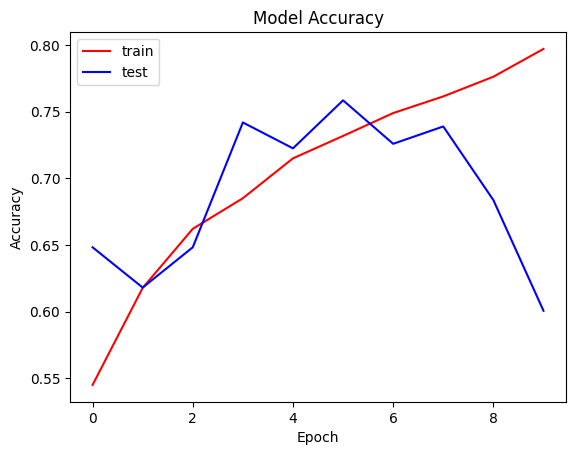

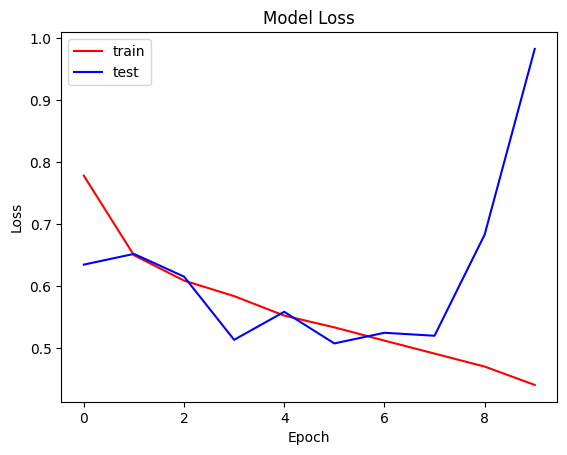

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [13]:
import cv2
test_img = cv2.imread("/content/cat.jpg")
test_img = cv2.resize(test_img, (256, 256))
test_img = test_img.astype('float32') / 255.0
test_img = test_img.reshape(1, 256, 256, 3)

prediction = model.predict(test_img)
print("Prediction:", "Cat" if prediction < 0.5 else "Dog")

1/1 [==============================] - 1s 867ms/step
Prediction: Cat
